In [112]:
# simple imputer applying rules
# - mean/median imputation: missing completely at random and less than 5%
# - arbitrary value imputation: not missing completely at random
# - end of distribution imputation: not missing completely at random

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

%matplotlib inline

excel_file_path = "./titanic_toy.csv"
df = pd.read_csv(excel_file_path, encoding="latin-1")
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [113]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [114]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [116]:
imputer1 = SimpleImputer(strategy="median")
imputer2 = SimpleImputer(strategy="mean")

# can also be used for filling missing categorical data:
# arbitrary value imputation
# imputer3 = SimpleImputer(strategy="constant", fill_value=99)
# using mode
# imputer4 = SimpleImputer(strategy="most_frequent")

trf = ColumnTransformer(
    [("imputer1", imputer1, ["Age"]), ("imputer2", imputer2, ["Fare"])],
    remainder="passthrough",
)
trf.fit(X_train)
ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ("imputer1", SimpleImputer(strategy="median"), ["Age"]),
        ("imputer2", SimpleImputer(), ["Fare"]),
    ],
)
print(trf.named_transformers_["imputer1"].statistics_)
print(trf.named_transformers_["imputer2"].statistics_)
X_train_trf = trf.transform(X_train)
X_test_trf = trf.transform(X_test)
X_train_trf

[28.75]
[32.61759689]


array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [117]:
X_train_trf = pd.DataFrame(X_train_trf, columns=X.columns)
print(X_train_trf.head())
X_test_trf = pd.DataFrame(X_test_trf, columns=X.columns)
print(X_test_trf.head())

    Age     Fare  Family
0  40.0  27.7208     0.0
1   4.0  16.7000     2.0
2  47.0   9.0000     0.0
3   9.0  31.3875     6.0
4  20.0   9.8458     0.0
    Age     Fare  Family
0  42.0  26.2875     0.0
1  21.0   8.0500     0.0
2  24.0  65.0000     3.0
3  28.0  56.4958     0.0
4  17.0   7.9250     6.0


In [118]:
# metrics to check the impact of imputation on the distribution:
# - covariance
# - boxplot
# - kde graph

print(X_train.cov())
print(X_train_trf.cov())

               Age         Fare     Family
Age     204.349513    70.719262  -6.498901
Fare     70.719262  2448.197914  17.258917
Family   -6.498901    17.258917   2.735252
               Age         Fare     Family
Age     161.989566    55.023037  -5.112563
Fare     55.023037  2324.238526  16.385048
Family   -5.112563    16.385048   2.735252


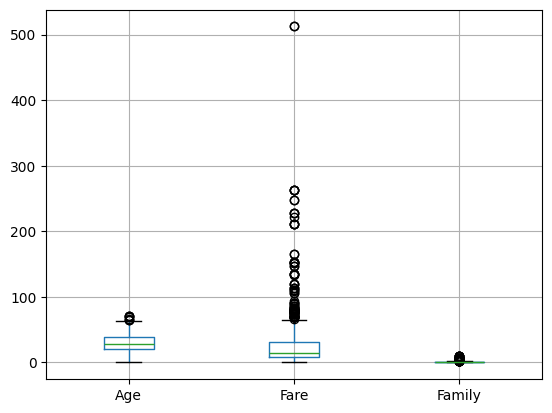

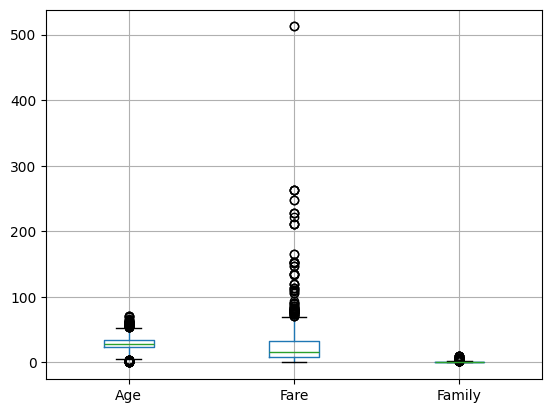

In [119]:
X_train.boxplot()
plt.show()
X_train_trf.boxplot()
plt.show()

In [120]:
def graph_comparison(df1, df2, col_name):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # x_train
    df1[col_name].plot(kind="kde", ax=ax, color="red")
    # x_train_trf
    df2[col_name].plot(kind="kde", ax=ax, color="green")

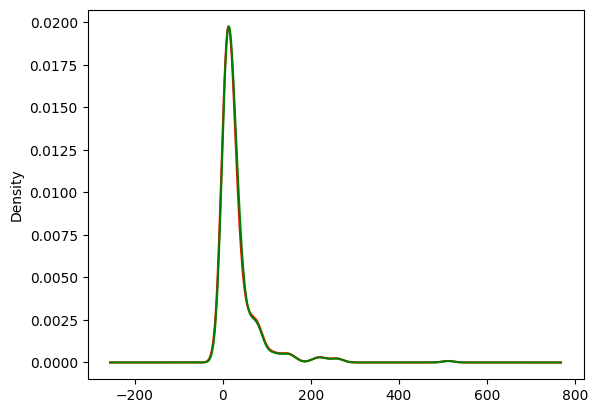

In [122]:
graph_comparison(X_train, X_train_trf, "Fare")  # 'Age'